In [77]:
import pandas as pd
import backtrader as bt
import datetime
import matplotlib as plt
%matplotlib auto

Using matplotlib backend: TkAgg


In [62]:
data = pd.read_excel('hdfc.xlsx')
data.to_csv('hdfc.csv',index=False)

In [63]:
def StringToDate(strng):
    if "AM" in strng:
        dtobj = datetime.datetime.strptime(strng, "%m/%d/%Y %H:%M:%S AM")
        return dtobj.strftime('%Y-%m-%d')
    else:
        dtobj = datetime.datetime.strptime(strng, "%Y-%d-%m %H:%M:%S")
        return dtobj.strftime('%Y-%m-%d')

In [64]:
df= pd.read_csv('hdfc.csv')


In [61]:
df.dtypes

SYMBOL       object
INTERVAL     object
DATE         object
OPEN        float64
HIGH        float64
LOW         float64
CLOSE       float64
VOLUME      float64
dtype: object

In [65]:
df['DATE']= df['DATE'].apply(StringToDate)
df.to_csv('hdfc1.csv',index=False)

In [66]:
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()

In [80]:
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.broker.set_cash(100000)
    
    Bdata= bt.feeds.GenericCSVData(
    
        dataname='hdfc1.csv',

        fromdate=datetime.datetime(2010, 3, 11),
        todate=datetime.datetime(2020, 2, 2),

        nullvalue=0.0,

        dtformat=('%Y-%m-%d'),

        datetime=2,
        high=4,
        low=5,
        open=3,
        close=6,
        volume=7,
    )
    cerebro.adddata(Bdata)
    cerebro.addstrategy(TestStrategy)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.plot()
    

Starting Portfolio Value: 100000.00
2010-03-11, Close, 540.31
2010-03-11, BUY CREATE, 540.31
2010-03-12, Close, 543.14
2010-03-15, Close, 535.05
2010-03-16, Close, 537.77
2010-03-17, Close, 545.35
2010-03-18, Close, 547.59
2010-03-19, Close, 538.89
2010-03-22, Close, 524.97
2010-03-22, BUY CREATE, 524.97
2010-03-23, Close, 524.31
2010-03-23, BUY CREATE, 524.31
2010-03-25, Close, 517.23
2010-03-25, BUY CREATE, 517.23
2010-03-26, Close, 522.60
2010-03-29, Close, 532.22
2010-03-30, Close, 527.74
2010-03-31, Close, 543.44
2010-04-01, Close, 556.51
2010-04-05, Close, 559.01
2010-04-06, Close, 564.99
2010-04-07, Close, 561.31
2010-04-08, Close, 545.18
2010-04-08, BUY CREATE, 545.18
2010-04-09, Close, 568.61
2010-04-12, Close, 565.56
2010-04-13, Close, 549.66
2010-04-13, BUY CREATE, 549.66
2010-04-15, Close, 537.94
2010-04-15, BUY CREATE, 537.94
2010-04-16, Close, 534.92
2010-04-16, BUY CREATE, 534.92
2010-04-19, Close, 538.63
2010-04-20, Close, 540.57
2010-04-21, Close, 540.96
2010-04-22, Cl

2011-09-23, Close, 625.00
2011-09-23, BUY CREATE, 625.00
2011-09-26, Close, 622.35
2011-09-26, BUY CREATE, 622.35
2011-09-27, Close, 641.15
2011-09-28, Close, 636.95
2011-09-29, Close, 652.45
2011-09-30, Close, 640.90
2011-10-03, Close, 634.45
2011-10-03, BUY CREATE, 634.45
2011-10-04, Close, 620.80
2011-10-04, BUY CREATE, 620.80
2011-10-05, Close, 624.95
2011-10-07, Close, 645.40
2011-10-10, Close, 662.55
2011-10-11, Close, 666.75
2011-10-12, Close, 669.90
2011-10-13, Close, 664.40
2011-10-14, Close, 666.80
2011-10-17, Close, 673.45
2011-10-18, Close, 673.80
2011-10-19, Close, 673.95
2011-10-20, Close, 644.95
2011-10-21, Close, 633.40
2011-10-21, BUY CREATE, 633.40
2011-10-24, Close, 640.50
2011-10-25, Close, 669.20
2011-10-26, Close, 667.20
2011-10-28, Close, 688.70
2011-10-31, Close, 688.85
2011-11-01, Close, 684.35
2011-11-02, Close, 682.70
2011-11-02, BUY CREATE, 682.70
2011-11-03, Close, 683.45
2011-11-04, Close, 683.90
2011-11-08, Close, 679.85
2011-11-09, Close, 682.40
2011-11-

2012-11-30, Close, 843.50
2012-12-03, Close, 836.20
2012-12-04, Close, 841.55
2012-12-05, Close, 837.95
2012-12-06, Close, 844.15
2012-12-07, Close, 837.75
2012-12-10, Close, 865.80
2012-12-11, Close, 874.95
2012-12-12, Close, 859.70
2012-12-13, Close, 854.30
2012-12-13, BUY CREATE, 854.30
2012-12-14, Close, 852.30
2012-12-14, BUY CREATE, 852.30
2012-12-17, Close, 836.85
2012-12-17, BUY CREATE, 836.85
2012-12-18, Close, 846.85
2012-12-19, Close, 830.75
2012-12-20, Close, 831.00
2012-12-21, Close, 830.20
2012-12-24, Close, 828.70
2012-12-24, BUY CREATE, 828.70
2012-12-26, Close, 834.70
2012-12-27, Close, 828.45
2012-12-28, Close, 834.40
2012-12-31, Close, 828.85
2013-01-01, Close, 832.95
2013-01-02, Close, 846.60
2013-01-03, Close, 845.50
2013-01-04, Close, 837.70
2013-01-04, BUY CREATE, 837.70
2013-01-07, Close, 822.95
2013-01-07, BUY CREATE, 822.95
2013-01-08, Close, 840.30
2013-01-09, Close, 830.00
2013-01-10, Close, 825.50
2013-01-10, BUY CREATE, 825.50
2013-01-11, Close, 809.50
201

2014-02-06, Close, 785.35
2014-02-07, Close, 783.45
2014-02-10, Close, 765.40
2014-02-10, BUY CREATE, 765.40
2014-02-11, Close, 774.80
2014-02-12, Close, 785.50
2014-02-13, Close, 766.05
2014-02-14, Close, 770.70
2014-02-17, Close, 779.30
2014-02-18, Close, 803.90
2014-02-19, Close, 805.80
2014-02-20, Close, 791.65
2014-02-21, Close, 800.60
2014-02-24, Close, 810.25
2014-02-25, Close, 811.40
2014-02-26, Close, 819.10
2014-02-28, Close, 819.30
2014-03-03, Close, 812.55
2014-03-04, Close, 821.85
2014-03-05, Close, 827.15
2014-03-06, Close, 837.85
2014-03-07, Close, 848.25
2014-03-10, Close, 850.20
2014-03-11, Close, 853.10
2014-03-12, Close, 854.65
2014-03-13, Close, 865.40
2014-03-14, Close, 856.65
2014-03-18, Close, 852.20
2014-03-18, BUY CREATE, 852.20
2014-03-19, Close, 867.70
2014-03-20, Close, 847.85
2014-03-21, Close, 843.25
2014-03-21, BUY CREATE, 843.25
2014-03-22, Close, 841.90
2014-03-22, BUY CREATE, 841.90
2014-03-24, Close, 860.25
2014-03-25, Close, 871.70
2014-03-26, Close,

2015-05-11, Close, 1226.10
2015-05-12, Close, 1191.35
2015-05-13, Close, 1219.40
2015-05-14, Close, 1209.70
2015-05-15, Close, 1234.30
2015-05-18, Close, 1264.30
2015-05-19, Close, 1240.55
2015-05-20, Close, 1270.05
2015-05-21, Close, 1255.95
2015-05-22, Close, 1288.05
2015-05-25, Close, 1252.65
2015-05-26, Close, 1240.45
2015-05-26, BUY CREATE, 1240.45
2015-05-27, Close, 1239.90
2015-05-27, BUY CREATE, 1239.90
2015-05-28, Close, 1229.25
2015-05-28, BUY CREATE, 1229.25
2015-05-29, Close, 1236.05
2015-06-01, Close, 1247.75
2015-06-02, Close, 1203.10
2015-06-03, Close, 1202.85
2015-06-03, BUY CREATE, 1202.85
2015-06-04, Close, 1216.00
2015-06-05, Close, 1201.35
2015-06-08, Close, 1176.75
2015-06-08, BUY CREATE, 1176.75
2015-06-09, Close, 1188.80
2015-06-10, Close, 1190.55
2015-06-11, Close, 1164.30
2015-06-12, Close, 1190.40
2015-06-15, Close, 1214.55
2015-06-16, Close, 1199.05
2015-06-17, Close, 1200.90
2015-06-18, Close, 1213.30
2015-06-19, Close, 1236.85
2015-06-22, Close, 1271.55
201

2016-08-11, Close, 1348.45
2016-08-12, Close, 1382.15
2016-08-16, Close, 1358.55
2016-08-17, Close, 1366.90
2016-08-18, Close, 1374.30
2016-08-19, Close, 1369.40
2016-08-22, Close, 1377.55
2016-08-23, Close, 1375.15
2016-08-24, Close, 1382.85
2016-08-25, Close, 1357.50
2016-08-26, Close, 1366.35
2016-08-29, Close, 1375.50
2016-08-30, Close, 1392.10
2016-08-31, Close, 1405.45
2016-09-01, Close, 1424.75
2016-09-02, Close, 1439.15
2016-09-06, Close, 1458.05
2016-09-07, Close, 1427.15
2016-09-08, Close, 1437.80
2016-09-09, Close, 1410.65
2016-09-12, Close, 1399.05
2016-09-12, BUY CREATE, 1399.05
2016-09-14, Close, 1392.20
2016-09-14, BUY CREATE, 1392.20
2016-09-15, Close, 1410.05
2016-09-16, Close, 1397.35
2016-09-19, Close, 1392.80
2016-09-19, BUY CREATE, 1392.80
2016-09-20, Close, 1393.10
2016-09-21, Close, 1392.35
2016-09-22, Close, 1413.25
2016-09-23, Close, 1425.10
2016-09-26, Close, 1412.45
2016-09-27, Close, 1418.90
2016-09-28, Close, 1423.55
2016-09-29, Close, 1401.40
2016-09-30, C

2017-10-17, Close, 1759.75
2017-10-17, BUY CREATE, 1759.75
2017-10-18, Close, 1751.55
2017-10-18, BUY CREATE, 1751.55
2017-10-19, Close, 1745.75
2017-10-19, BUY CREATE, 1745.75
2017-10-23, Close, 1722.40
2017-10-23, BUY CREATE, 1722.40
2017-10-24, Close, 1722.30
2017-10-24, BUY CREATE, 1722.30
2017-10-25, Close, 1677.65
2017-10-25, BUY CREATE, 1677.65
2017-10-26, Close, 1692.35
2017-10-27, Close, 1699.05
2017-10-30, Close, 1705.80
2017-10-31, Close, 1707.40
2017-11-01, Close, 1754.30
2017-11-02, Close, 1762.25
2017-11-03, Close, 1776.30
2017-11-06, Close, 1790.20
2017-11-07, Close, 1764.65
2017-11-08, Close, 1747.45
2017-11-08, BUY CREATE, 1747.45
2017-11-09, Close, 1725.85
2017-11-09, BUY CREATE, 1725.85
2017-11-10, Close, 1709.50
2017-11-10, BUY CREATE, 1709.50
2017-11-13, Close, 1670.30
2017-11-13, BUY CREATE, 1670.30
2017-11-14, Close, 1661.40
2017-11-14, BUY CREATE, 1661.40
2017-11-15, Close, 1650.90
2017-11-15, BUY CREATE, 1650.90
2017-11-16, Close, 1664.40
2017-11-17, Close, 170

2018-12-17, Close, 1960.35
2018-12-18, Close, 1952.00
2018-12-19, Close, 1981.70
2018-12-20, Close, 1974.70
2018-12-21, Close, 1948.60
2018-12-21, BUY CREATE, 1948.60
2018-12-24, Close, 1902.15
2018-12-24, BUY CREATE, 1902.15
2018-12-26, Close, 1933.35
2018-12-27, Close, 1948.85
2018-12-28, Close, 1979.95
2018-12-31, Close, 1968.35
2019-01-01, Close, 2009.00
2019-01-02, Close, 1980.65
2019-01-03, Close, 1936.85
2019-01-03, BUY CREATE, 1936.85
2019-01-04, Close, 1972.60
2019-01-07, Close, 1972.90
2019-01-08, Close, 1958.95
2019-01-09, Close, 1994.95
2019-01-10, Close, 1980.10
2019-01-11, Close, 1991.40
2019-01-14, Close, 1969.20
2019-01-15, Close, 1992.15
2019-01-16, Close, 1975.00
2019-01-17, Close, 2004.55
2019-01-18, Close, 2006.85
2019-01-21, Close, 2004.45
2019-01-22, Close, 1979.40
2019-01-22, BUY CREATE, 1979.40
2019-01-23, Close, 1958.25
2019-01-23, BUY CREATE, 1958.25
2019-01-24, Close, 1971.10
2019-01-25, Close, 1977.80
2019-01-28, Close, 1946.90
2019-01-29, Close, 1922.30
201

2020-01-27, Close, 2395.80
2020-01-28, Close, 2431.60
2020-01-29, Close, 2404.25
2020-01-30, Close, 2415.00
2020-01-31, Close, 2414.00
2020-02-01, Close, 2268.25
2020-02-01, BUY CREATE, 2268.25
Final Portfolio Value: 347473.97


<IPython.core.display.Javascript object>


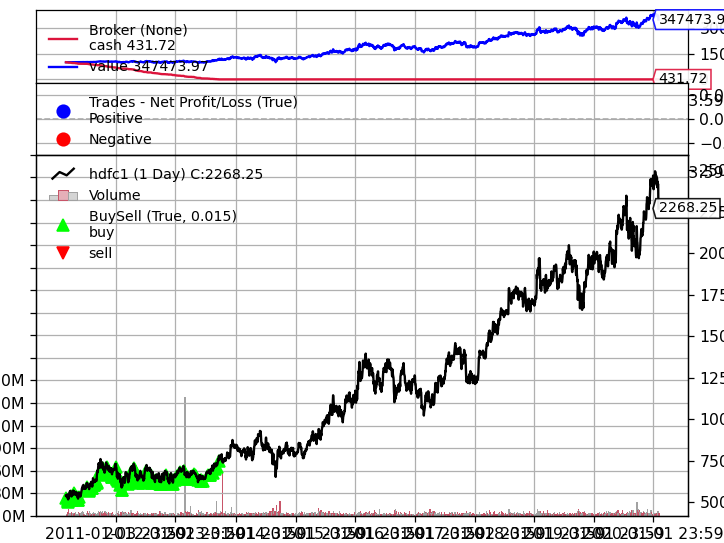

[[<Figure size 640x480 with 4 Axes>]]

In [81]:
fig = cerebro.plot()
fig